gerando entradas
iteração: 1
tempo: 0.00s
b'194666968622393'
tempo: 0.41s
b'326584914302407'
tempo: 0.90s
b'294930640290953'
tempo: 1.23s
b'311589542570153'
tempo: 1.85s
b'364783520566891'
tempo: 2.34s
b'352016464398713'
tempo: 2.64s
b'327155914920589'
tempo: 2.98s
b'163116436564667'
tempo: 3.66s
b'284816321307929'
tempo: 4.02s
b'112829485188071'
tempo: 4.45s
iteração: 2
tempo: 0.00s
b'194666968622393'
tempo: 0.39s
b'326584914302407'
tempo: 0.86s
b'294930640290953'
tempo: 1.19s
b'311589542570153'
tempo: 1.81s
b'364783520566891'
tempo: 2.28s
b'352016464398713'
tempo: 2.58s
b'327155914920589'
tempo: 2.93s
b'163116436564667'
tempo: 3.60s
b'284816321307929'
tempo: 3.97s
b'112829485188071'
tempo: 4.39s
iteração: 3
tempo: 0.00s
b'194666968622393'
tempo: 0.39s
b'326584914302407'
tempo: 0.86s
b'294930640290953'
tempo: 1.20s
b'311589542570153'
tempo: 1.82s
b'364783520566891'
tempo: 2.30s
b'352016464398713'
tempo: 2.61s
b'327155914920589'
tempo: 2.95s
b'163116436564667'
tempo: 3.64s
b'2848163213

C:\Users\tiago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


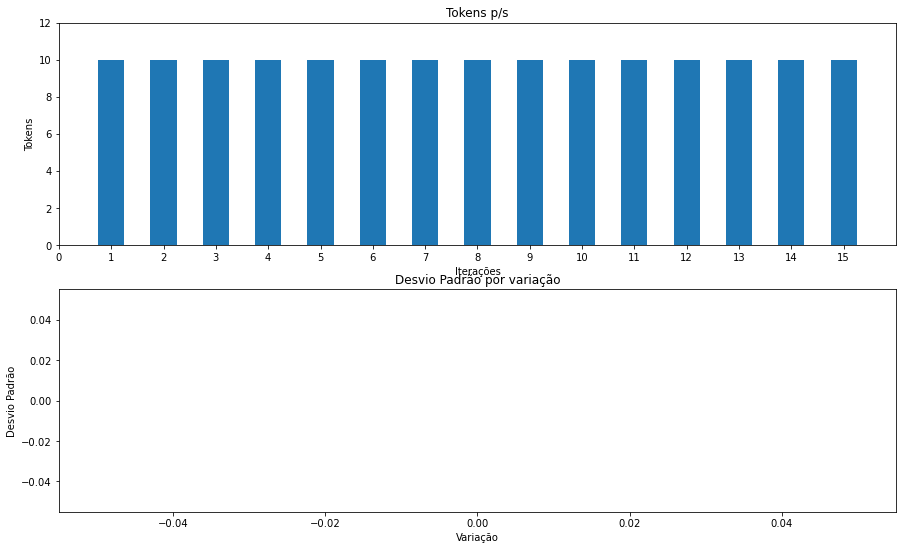

In [1]:
import socket
import matplotlib.pyplot as plt
import numpy as np
from time import time
from random import randint
from scipy import stats

def test():
    seconds = 5
    iteration = 15

    print('gerando entradas')
    messages = []
    for i in range(1000): # magic number, defines how many inputs should be generated for testing
        code = randint(10000000, 20000000)
        n = randint(5000, 15000)
        messages.append(str(code) + '&' + str(n))

    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect(("localhost", 50002))

    iterations = []
    avg_time = []
    for i in range(iteration):
        print('iteração: ' + str(i + 1))

        max_runtime = time() + seconds
        count = 0.0
        token_cnt = 0
        tokens = []
        time_per_token = []
        
        while max_runtime > time():
            count = seconds - (max_runtime - time())
            print(f'tempo: {count:.2f}s')

            s.sendall(bytes(str(messages[token_cnt]), encoding='utf-8'))

            token = s.recv(1024).decode()
            if (time() <= max_runtime):
                countAfter = seconds - (max_runtime - time())
                print(token)
                tokens.append(f"{token}")
                token_cnt += 1
                time_per_token.append(countAfter - count)

        iterations.append(tokens)
        avg_time.append(time_per_token)

    s.close()

    iteration_label = []
    token_cnt_label = []
    tokens_per_second_label = []
    time_per_tokenLabel = []
    max_tokens = 0
    max_time_to_generate = 0
    max_seconds = 0

    for i in range(len(iterations)):
        time_per_token = 0
        for j in range(len(avg_time[i])):
            time_per_token += avg_time[i][j]
            if avg_time[i][j] > max_time_to_generate:
                max_time_to_generate = avg_time[i][j]
            time_per_tokenLabel.append(avg_time[i][j])

        print('iteração: ' + str(i + 1))

        print('tokens gerados: ' + str(len(iterations[i])))

        if len(iterations[i]) > max_tokens:
            max_tokens = len(iterations[i])

        if len(iterations[i]) / seconds > max_seconds:
            max_seconds = len(iterations[i]) / seconds

        iteration_label.append(i + 1)
        token_cnt_label.append(len(iterations[i]))

        tokens_per_second_label.append(len(iterations[i]) / seconds)

    soma = sum(token_cnt_label)
    media = soma/len(token_cnt_label)
    variancia = 0
    for i in range(len(token_cnt_label)):
        distancia = (token_cnt_label[i]-media)**2
        variancia += distancia
    desvioPadrao = variancia/len(token_cnt_label)
    normal = stats.norm(media, desvioPadrao)

    print("variance: ", variancia)
    print("standard deviation: ", desvioPadrao)

    print('\n\nplotting...')
    fig, (graph1, graph2) = plt.subplots(
        nrows=2, ncols=1, figsize=(15, 9))

    graph1.set_xlabel('Iterações')
    graph1.set_ylabel('Tokens')
    graph1.set_title('Tokens p/s')
    graph1.bar(iteration_label, token_cnt_label, width=0.5)
    graph1.set(xlim=(0, len(iterations) + 1), xticks=np.arange(0, len(iterations) + 1, 1),
            ylim=(0, max_tokens + 2))

    graph2.set_ylabel('Desvio Padrão')
    graph2.set_xlabel('Variação')
    graph2.set_title('Desvio Padrão por variação')
    graph2.plot(token_cnt_label, normal.pdf(token_cnt_label))


    plt.show()


test()
